In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Import the datasets

In [45]:
df1 = pd.read_csv('weather_features.csv')
df1.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### Clean the data dropping NA values and in the case of df2 dropping cells that has only 1 unique value

In [47]:
df1 = df1.dropna()

## Data Exploration

#### Correlation between variables

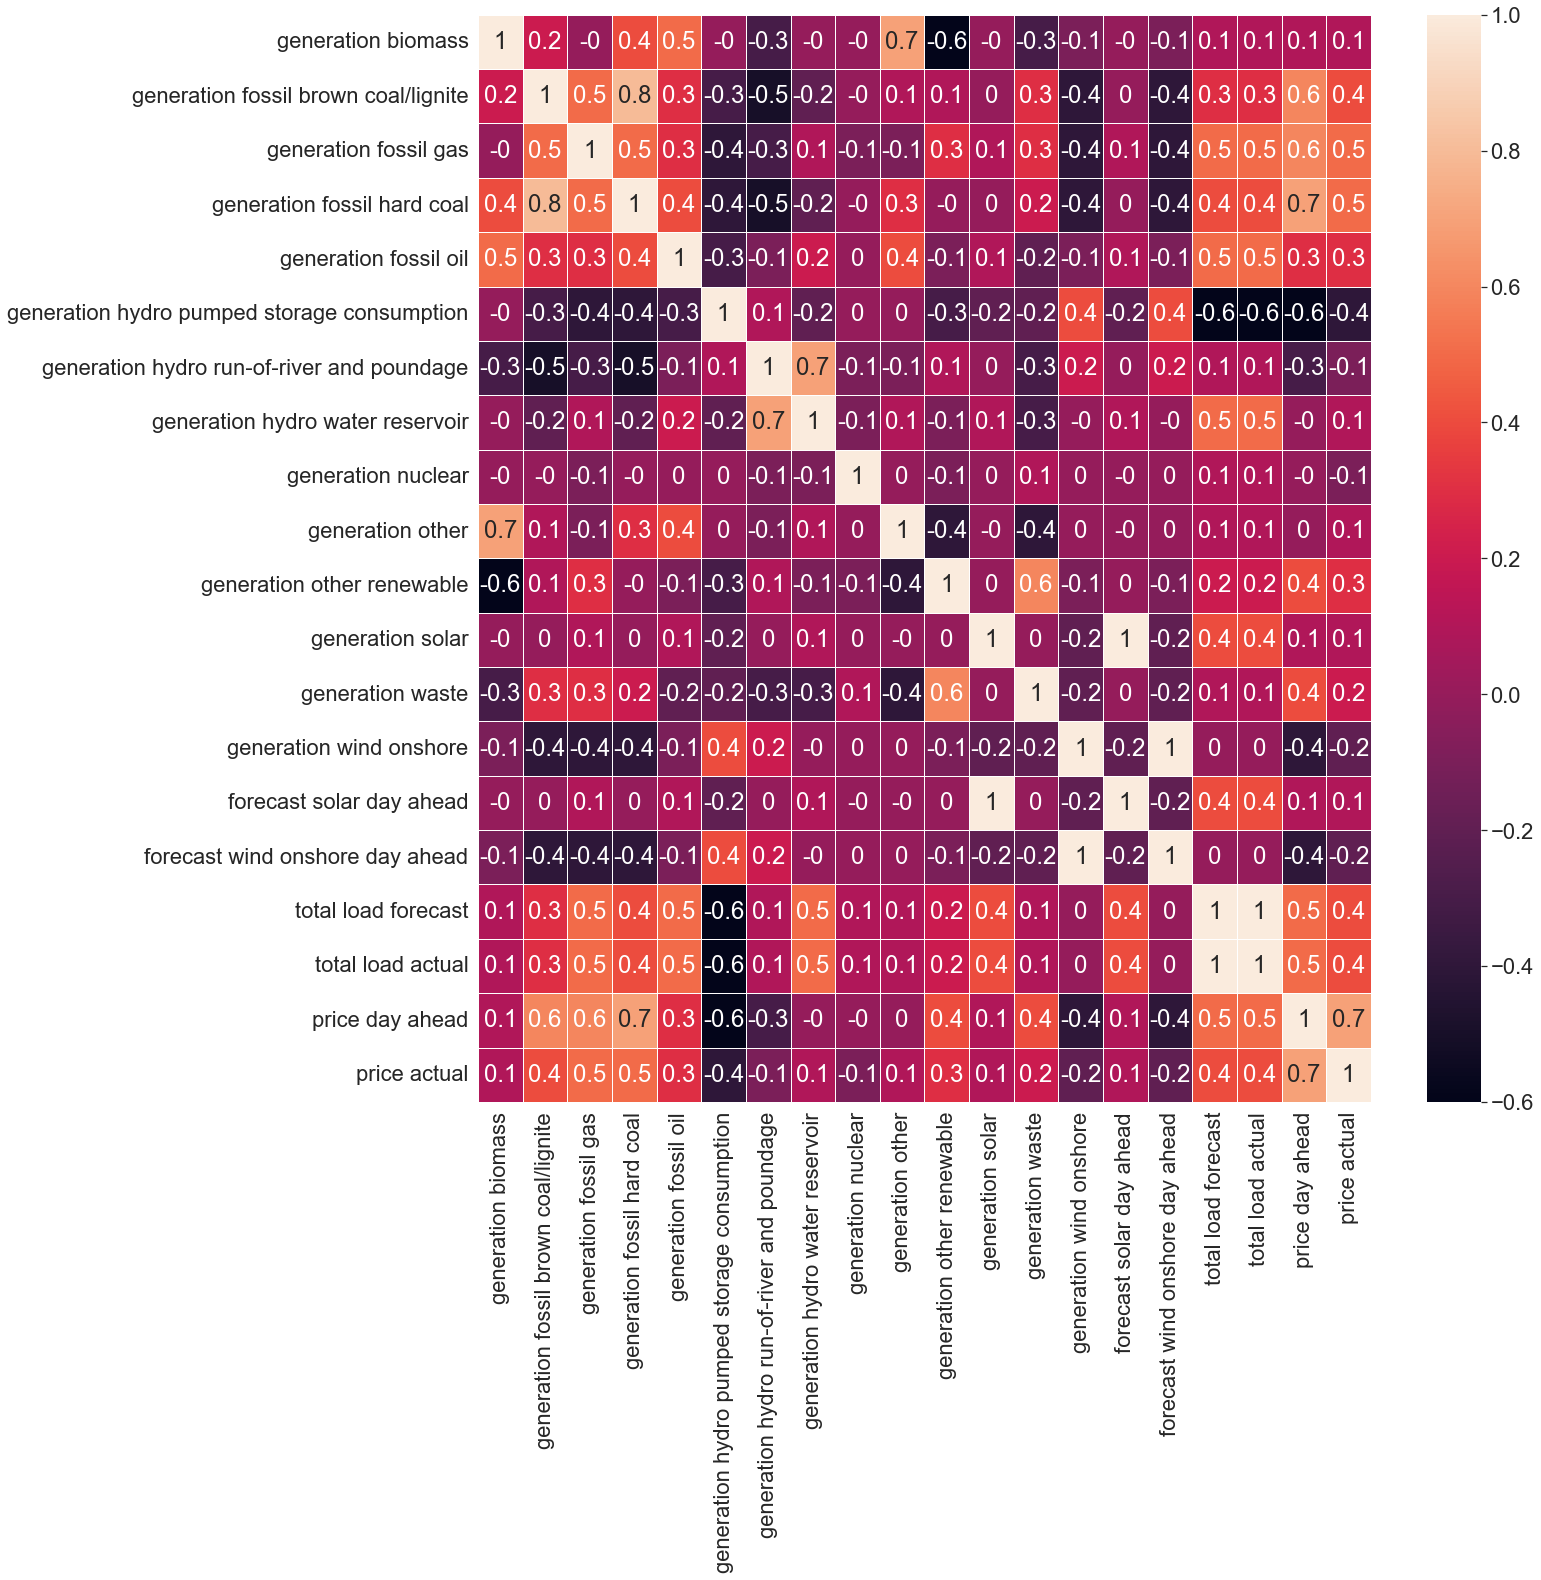

In [50]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.heatmap(round(df2.corr(),1),annot=True,linewidth=0.8)
plt.show();

<AxesSubplot:xlabel='price actual', ylabel='Count'>

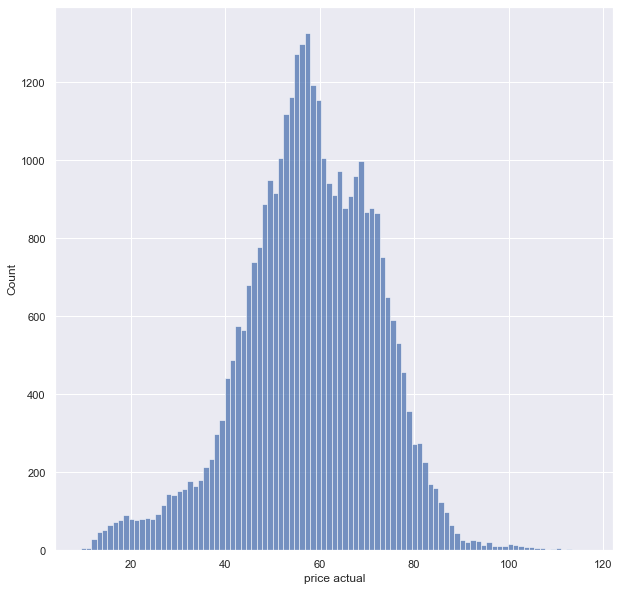

In [51]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 1)
sns.histplot(df2,x='price actual')

### we can see from the plot that the actual price makes a gaussian distribution

In [52]:
df1['weather_main'].unique()

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [53]:
df1['city_name'].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [54]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df1['weather_main'])
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print(y)

cn = label_encoder.fit_transform(df1['city_name'])
x = df1.drop(['weather_main','weather_id','weather_description','weather_icon','city_name','dt_iso'],axis=1)
x['city_name'] = cn
x

[0 0 0 ... 0 0 0]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,city_name
0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,4
1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,4
2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,4
3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,4
4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
178391,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,3
178392,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,3
178393,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,3
178394,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,3


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(12,)),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(12,activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
3903/3903 [==============================] - 3s 735us/step - loss: 4.6171 - accuracy: 0.7739
Epoch 2/30
3903/3903 [==============================] - 3s 729us/step - loss: 1.0176 - accuracy: 0.8506
Epoch 3/30
3903/3903 [==============================] - 3s 705us/step - loss: 0.5594 - accuracy: 0.8714
Epoch 4/30
3903/3903 [==============================] - 3s 696us/step - loss: 0.4141 - accuracy: 0.8893
Epoch 5/30
3903/3903 [==============================] - 3s 737us/step - loss: 0.3408 - accuracy: 0.9199
Epoch 6/30
3903/3903 [==============================] - 3s 702us/step - loss: 0.3369 - accuracy: 0.9264
Epoch 7/30
3903/3903 [==============================] - 3s 706us/step - loss: 0.2766 - accuracy: 0.9370
Epoch 8/30
3903/3903 [==============================] - 3s 707us/step - loss: 0.3213 - accuracy: 0.9354
Epoch 9/30
3903/3903 [==============================] - 3s 699us/step - loss: 0.2608 - accuracy: 0.9392
Epoch 10/30
3903/3903 [==============================] - 3s 717u

In [78]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)

1673/1673 [==============================] - 1s 446us/step - loss: 0.2462 - accuracy: 0.9421


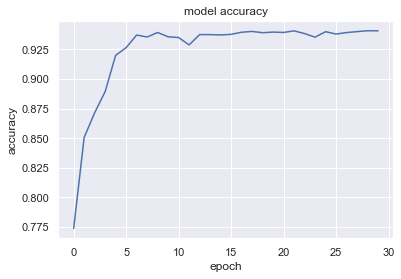

In [81]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

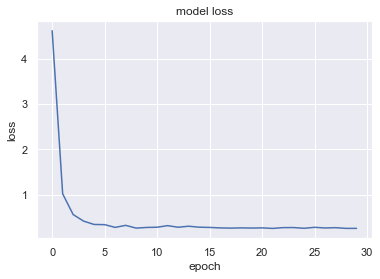

In [82]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()